# Homework 02 - ML for Regression

Link to Homework - https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/cohorts/2025/02-regression/homework.md 

The goal of this homework is to create a regression model for predicting the car fuel efficiency (column 'fuel_efficiency_mpg').

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns

## Download dataset 

In [2]:
# ! wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

## Read Data file

In [3]:
df = pd.read_csv('car_fuel_efficiency.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   num_cylinders        9222 non-null   float64
 2   horsepower           8996 non-null   float64
 3   vehicle_weight       9704 non-null   float64
 4   acceleration         8774 non-null   float64
 5   model_year           9704 non-null   int64  
 6   origin               9704 non-null   object 
 7   fuel_type            9704 non-null   object 
 8   drivetrain           9704 non-null   object 
 9   num_doors            9202 non-null   float64
 10  fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 834.1+ KB


In [4]:
columns_to_use = ['engine_displacement','horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']

In [5]:
columns_to_use[:-1]

['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']

In [6]:
df = df[columns_to_use]

In [7]:
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


## Exploratory Data Analysis

In [8]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

engine_displacement
[170 130 220 210 190]
36

horsepower
[159.  97.  78.  nan 140.]
192

vehicle_weight
[3413.43375861 3149.66493422 3079.03899737 2542.39240183 3460.87098999]
9704

model_year
[2003 2007 2018 2009 2008]
24

fuel_efficiency_mpg
[13.23172891 13.68821744 14.246341   16.9127356  12.48836912]
9704



## Question 1 
There's one column with missing values. What is it?

In [9]:
nan_columns = df.isna().sum()
nan_columns

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

##  Look at the fuel_efficiency_mpg variable. Does it have a long tail? 

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

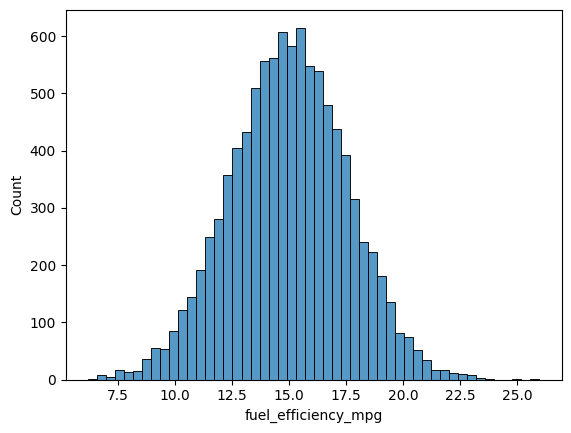

In [11]:
sns.histplot(df['fuel_efficiency_mpg'], bins=50)

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

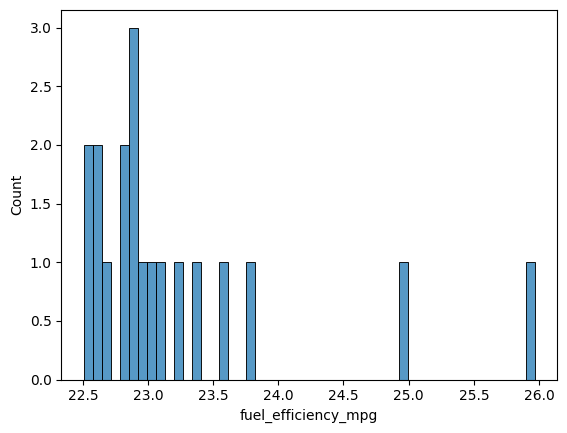

In [12]:
sns.histplot(df[df['fuel_efficiency_mpg']>22.5].fuel_efficiency_mpg , bins=50)

## Question 2 
What's the median (50% percentile) for variable 'horsepower'?

In [13]:
df['horsepower'].median()

np.float64(149.0)

## Prepare and split the dataset
Shuffle the dataset (the filtered one you created above), use seed 42.
Split your data in train/val/test sets, with 60%/20%/20% distribution.

In [14]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [15]:
n_val, n_test, n_train

(1940, 1940, 5824)

In [16]:
# shuffle the dataset 
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [17]:
idx

array([ 483, 7506, 8795, ..., 5390,  860, 7270], shape=(9704,))

In [18]:
# Split into train, test, val 
df_train = df.iloc[idx[0:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]


In [19]:
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
483,220,144.0,2535.887591,2009,16.642943
7506,160,141.0,2741.170484,2019,16.298377
8795,230,155.0,2471.880237,2017,18.591822
1688,150,206.0,3748.164469,2015,11.818843
6217,300,111.0,2135.716359,2006,19.402209


In [20]:
df_val.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
6163,180,112.0,2772.134410,2020,15.366341
3313,260,138.0,3014.061530,2022,14.601182
4781,140,181.0,3652.186151,2016,12.247032
8210,270,105.0,2753.040847,2023,15.136400
6713,170,224.0,4163.375137,2003,10.340419


In [21]:
df_test.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
3729,140,148.0,2704.826005,2017,15.804354
7764,210,136.0,3001.227490,2004,14.272374
4358,210,152.0,3747.467392,2021,11.748441
5922,190,128.0,2705.833636,2014,16.485991
1343,230,156.0,2505.939657,2005,17.779704


In [22]:
len(df_train), len(df_val), len(df_test)

(5824, 1940, 1940)

In [23]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [24]:
y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

In [25]:
y_train[0:10]

array([2.8703359 , 2.85061269, 2.97511223, 2.55091621, 3.01564318,
       2.5760973 , 2.51595295, 2.87171511, 2.82253099, 2.71476081])

In [26]:
df_train = df_train.drop('fuel_efficiency_mpg', axis=1)
df_val = df_val.drop('fuel_efficiency_mpg', axis=1)
df_test = df_test.drop('fuel_efficiency_mpg', axis = 1)

## Question 3 
- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?

In [36]:
def prepare_dataset(df, column_to_fill=None, value_to_fill=0):
    df = df.copy()
    if column_to_fill:
        df[column_to_fill] = df[column_to_fill].fillna(value_to_fill)
    else:
        print('both column and value to fill are required')
        return 
    return df.to_numpy()    


In [ ]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [ ]:
X_train = prepare_dataset(df_train, 'horsepower', 0)

w0, w = train_linear_regression(X_train, y_train)

[[ 220.          144.         2535.88759124 2009.        ]
 [ 160.          141.         2741.17048439 2019.        ]
 [ 230.          155.         2471.88023726 2017.        ]
 ...
 [ 210.          152.         2500.17568746 2020.        ]
 [ 250.          154.         2254.31324473 2002.        ]
 [ 210.          152.         2435.20360628 2004.        ]]


In [ ]:
mean_hp = df_train.horsepower.mean()

X_train_fillna_mean = prepare_dataset(df_train, 'horsepower', mean_hp)

w0_fillna_mean, w_fillna_mean = train_linear_regression(X_train_fillna_mean, y_train)

In [51]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return round(np.sqrt(mse), 7)

In [45]:
X_val = prepare_dataset(df_val, 'horsepower', 0)
y_pred = w0 + X_val.dot(w)
print(f'RMSE with horsepower filled with 0 : {rmse(y_val, y_pred)}')

X_val = prepare_dataset(df_val, 'horsepower', mean_hp)
y_pred_fillna_mean = w0_fillna_mean + X_val.dot(w_fillna_mean)
print(f'RMSE with horsepower filled with mean horsepower : {rmse(y_val, y_pred_fillna_mean)}')

RMSE with horsepower filled with 0 : 0.04
RMSE with horsepower filled with mean horsepower : 0.0373


## Question 4 
- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?

If multiple options give the same best RMSE, select the smallest r.

In [47]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [52]:
for r in [0.0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train = prepare_dataset(df_train, 'horsepower', 0)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_dataset(df_val, 'horsepower', 0)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, score)

0.0 3.6646662472218297 0.0399793
0.01 3.1688134470074534 0.0399779
0.1 1.4288369989383432 0.0405087
1 0.22012861946726972 0.0413539
5 0.04624885656570121 0.0415061
10 0.023271722731248758 0.0415268
100 0.0023413689852701753 0.0415458


## Question 5 

- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))

What's the value of std?


## Question 6 

- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.

What's the RMSE on the test dataset?